# MACHINE LEARNING: GENRE CLASSIFICATION (MULTI-CLASS CLASSIFICATION)

In [1]:
# ============================================================================
# MACHINE LEARNING PIPELINE: GENRE CLASSIFICATION
# ============================================================================

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                            precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clean_path = r"D:\UNH Materials\Projects\Spotify Song Recommendations\data\df_clean.csv"

# Step 1: Create a copy of df_clean for classification
ml_class_df = pd.read_csv(df_clean_path)
print(f"\n1. Created ml_class_df with shape: {ml_class_df.shape}")


1. Created ml_class_df with shape: (85000, 32)


In [3]:
print("="*80)
print("MACHINE LEARNING: GENRE CLASSIFICATION")
print("="*80)


# Step 2: Select features for training (same as regression)
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                     'instrumentalness', 'tempo', 'duration_min', 'explicit']

categorical_features = ['country', 'label']  # Exclude 'genre' as it's our target

# Check if features exist
available_numerical = [f for f in numerical_features if f in ml_class_df.columns]
available_categorical = [f for f in categorical_features if f in ml_class_df.columns]

print(f"\n2. Selected Features:")
print(f"   Numerical features ({len(available_numerical)}): {available_numerical}")
print(f"   Categorical features ({len(available_categorical)}): {available_categorical}")

# Step 3: Prepare target variable (genre)
target = 'genre'
X = ml_class_df[available_numerical + available_categorical].copy()
y = ml_class_df[target].copy()

print(f"\n3. Target variable: {target}")
print(f"   Number of classes: {y.nunique()}")
print(f"   Classes: {sorted(y.unique())}")
print(f"   Class distribution:")
print(y.value_counts().sort_index())

# Step 4: Encode categorical features (using One-Hot Encoding)
print(f"\n4. Encoding categorical features with One-Hot Encoding...")
X_encoded = X.copy()
original_columns = X_encoded.columns.tolist()

# Separate numerical and categorical columns
X_numerical = X_encoded[available_numerical].copy()
X_categorical = X_encoded[available_categorical].copy()

# Apply One-Hot Encoding to categorical features
if len(available_categorical) > 0:
    print(f"   Applying OneHotEncoder to {len(available_categorical)} categorical features...")
    ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
    X_categorical_encoded = ohe.fit_transform(X_categorical)
    categorical_feature_names = ohe.get_feature_names_out(available_categorical)
    
    # Combine numerical and encoded categorical features
    X_encoded = pd.DataFrame(
        data=np.hstack([X_numerical.values, X_categorical_encoded]),
        columns=list(available_numerical) + list(categorical_feature_names),
        index=X_encoded.index
    )
else:
    X_encoded = X_numerical.copy()

print(f"   Total features after encoding: {X_encoded.shape[1]} (was {len(original_columns)})")

# Step 5: Train-Test Split
print(f"\n5. Performing train-test split...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y  # Stratify for balanced split
)
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")

# Step 6: Scale numerical features
print(f"\n6. Scaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[available_numerical] = scaler.fit_transform(X_train[available_numerical])
X_test_scaled[available_numerical] = scaler.transform(X_test[available_numerical])

print(f"   Scaling completed for {len(available_numerical)} numerical features")

# Prepare feature names for later use
feature_names = X_encoded.columns.tolist()
print(f"   Total feature names: {len(feature_names)}")

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE")
print("="*80)

MACHINE LEARNING: GENRE CLASSIFICATION

2. Selected Features:
   Numerical features (9): ['danceability', 'energy', 'key', 'loudness', 'mode', 'instrumentalness', 'tempo', 'duration_min', 'explicit']
   Categorical features (2): ['country', 'label']

3. Target variable: genre
   Number of classes: 12
   Classes: ['Classical', 'Country', 'EDM', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Reggaeton', 'Rock']
   Class distribution:
genre
Classical    7158
Country      7030
EDM          6894
Folk         7080
Hip-Hop      7160
Indie        7007
Jazz         7177
Metal        7200
Pop          7096
R&B          7084
Reggaeton    7001
Rock         7113
Name: count, dtype: int64

4. Encoding categorical features with One-Hot Encoding...
   Applying OneHotEncoder to 2 categorical features...
   Total features after encoding: 27 (was 11)

5. Performing train-test split...
   Training set: 68,000 samples
   Test set: 17,000 samples

6. Scaling numerical features...
   Scaling com

In [4]:
# Step 7: Train Multiple Classification Models
print("="*80)
print("TRAINING CLASSIFICATION MODELS")
print("="*80)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=20),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Dictionary to store results
classification_results = {}

print("\nTraining models...")
for name, model in models.items():
    print(f"\n  Training {name}...", end=" ")
    
    try:
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
        
        # Store results
        classification_results[name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1': test_f1,
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred,
            'classification_report': classification_report(y_test, y_test_pred, output_dict=True)
        }
        
        print(f"✓ (Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f})")
        
    except Exception as e:
        print(f"✗ Failed: {str(e)}")
        continue

print("\n" + "="*80)
print("ALL MODELS TRAINED SUCCESSFULLY")
print("="*80)

TRAINING CLASSIFICATION MODELS

Training models...

  Training Logistic Regression... ✓ (Test Accuracy: 0.0839, Test F1: 0.0778)

  Training KNN... ✓ (Test Accuracy: 0.0832, Test F1: 0.0766)

  Training Naive Bayes... ✓ (Test Accuracy: 0.0884, Test F1: 0.0845)

  Training Decision Tree... ✓ (Test Accuracy: 0.0822, Test F1: 0.0647)

  Training Random Forest... ✓ (Test Accuracy: 0.0841, Test F1: 0.0838)

ALL MODELS TRAINED SUCCESSFULLY


In [5]:
# Step 8: Display Results Summary
print("="*80)
print("MODEL EVALUATION RESULTS")
print("="*80)

# Create results DataFrame
results_class_df = pd.DataFrame({
    'Model': list(classification_results.keys()),
    'Train Accuracy': [classification_results[m]['train_accuracy'] for m in classification_results.keys()],
    'Test Accuracy': [classification_results[m]['test_accuracy'] for m in classification_results.keys()],
    'Test Precision': [classification_results[m]['test_precision'] for m in classification_results.keys()],
    'Test Recall': [classification_results[m]['test_recall'] for m in classification_results.keys()],
    'Test F1-Score': [classification_results[m]['test_f1'] for m in classification_results.keys()]
})

# Sort by Test Accuracy (descending)
results_class_df = results_class_df.sort_values('Test Accuracy', ascending=False)

print("\nResults Summary (sorted by Test Accuracy):")
print("-"*80)
print(results_class_df.to_string(index=False))
print("-"*80)

# Find best model
best_model_name = results_class_df.iloc[0]['Model']
best_test_accuracy = results_class_df.iloc[0]['Test Accuracy']
best_test_f1 = results_class_df.iloc[0]['Test F1-Score']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test Accuracy: {best_test_accuracy:.4f}")
print(f"   Test F1-Score: {best_test_f1:.4f}")

MODEL EVALUATION RESULTS

Results Summary (sorted by Test Accuracy):
--------------------------------------------------------------------------------
              Model  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score
        Naive Bayes        0.091103       0.088353        0.087535     0.088353       0.084495
      Random Forest        1.000000       0.084118        0.084170     0.084118       0.083821
Logistic Regression        0.091618       0.083882        0.082437     0.083882       0.077751
                KNN        0.334353       0.083235        0.082974     0.083235       0.076612
      Decision Tree        0.221838       0.082235        0.082245     0.082235       0.064678
--------------------------------------------------------------------------------

🏆 Best Model: Naive Bayes
   Test Accuracy: 0.0884
   Test F1-Score: 0.0845


In [6]:
# Step 9: Classification Reports for All Models
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS")
print("="*80)

for name, result in classification_results.items():
    print(f"\n{name}:")
    print("-" * 80)
    print(classification_report(y_test, result['y_test_pred'], 
                               target_names=sorted(y.unique()), 
                               digits=4))
    print("-" * 80)


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

   Classical     0.0848    0.1508    0.1086      1432
     Country     0.0896    0.0733    0.0806      1406
         EDM     0.0815    0.0276    0.0412      1379
        Folk     0.0836    0.0530    0.0649      1416
     Hip-Hop     0.0828    0.0978    0.0897      1432
       Indie     0.0752    0.0471    0.0579      1401
        Jazz     0.0941    0.2070    0.1294      1435
       Metal     0.0763    0.1042    0.0881      1440
         Pop     0.0703    0.0430    0.0533      1419
         R&B     0.0893    0.0621    0.0733      1417
   Reggaeton     0.0828    0.0471    0.0601      1400
        Rock     0.0788    0.0885    0.0834      1423

    accuracy                         0.0839     17000
   macro avg     0.0824    0.0835    0.0775     17000
weighted avg     0.0824    0.0839    0.0778     1700


CONFUSION MATRICES


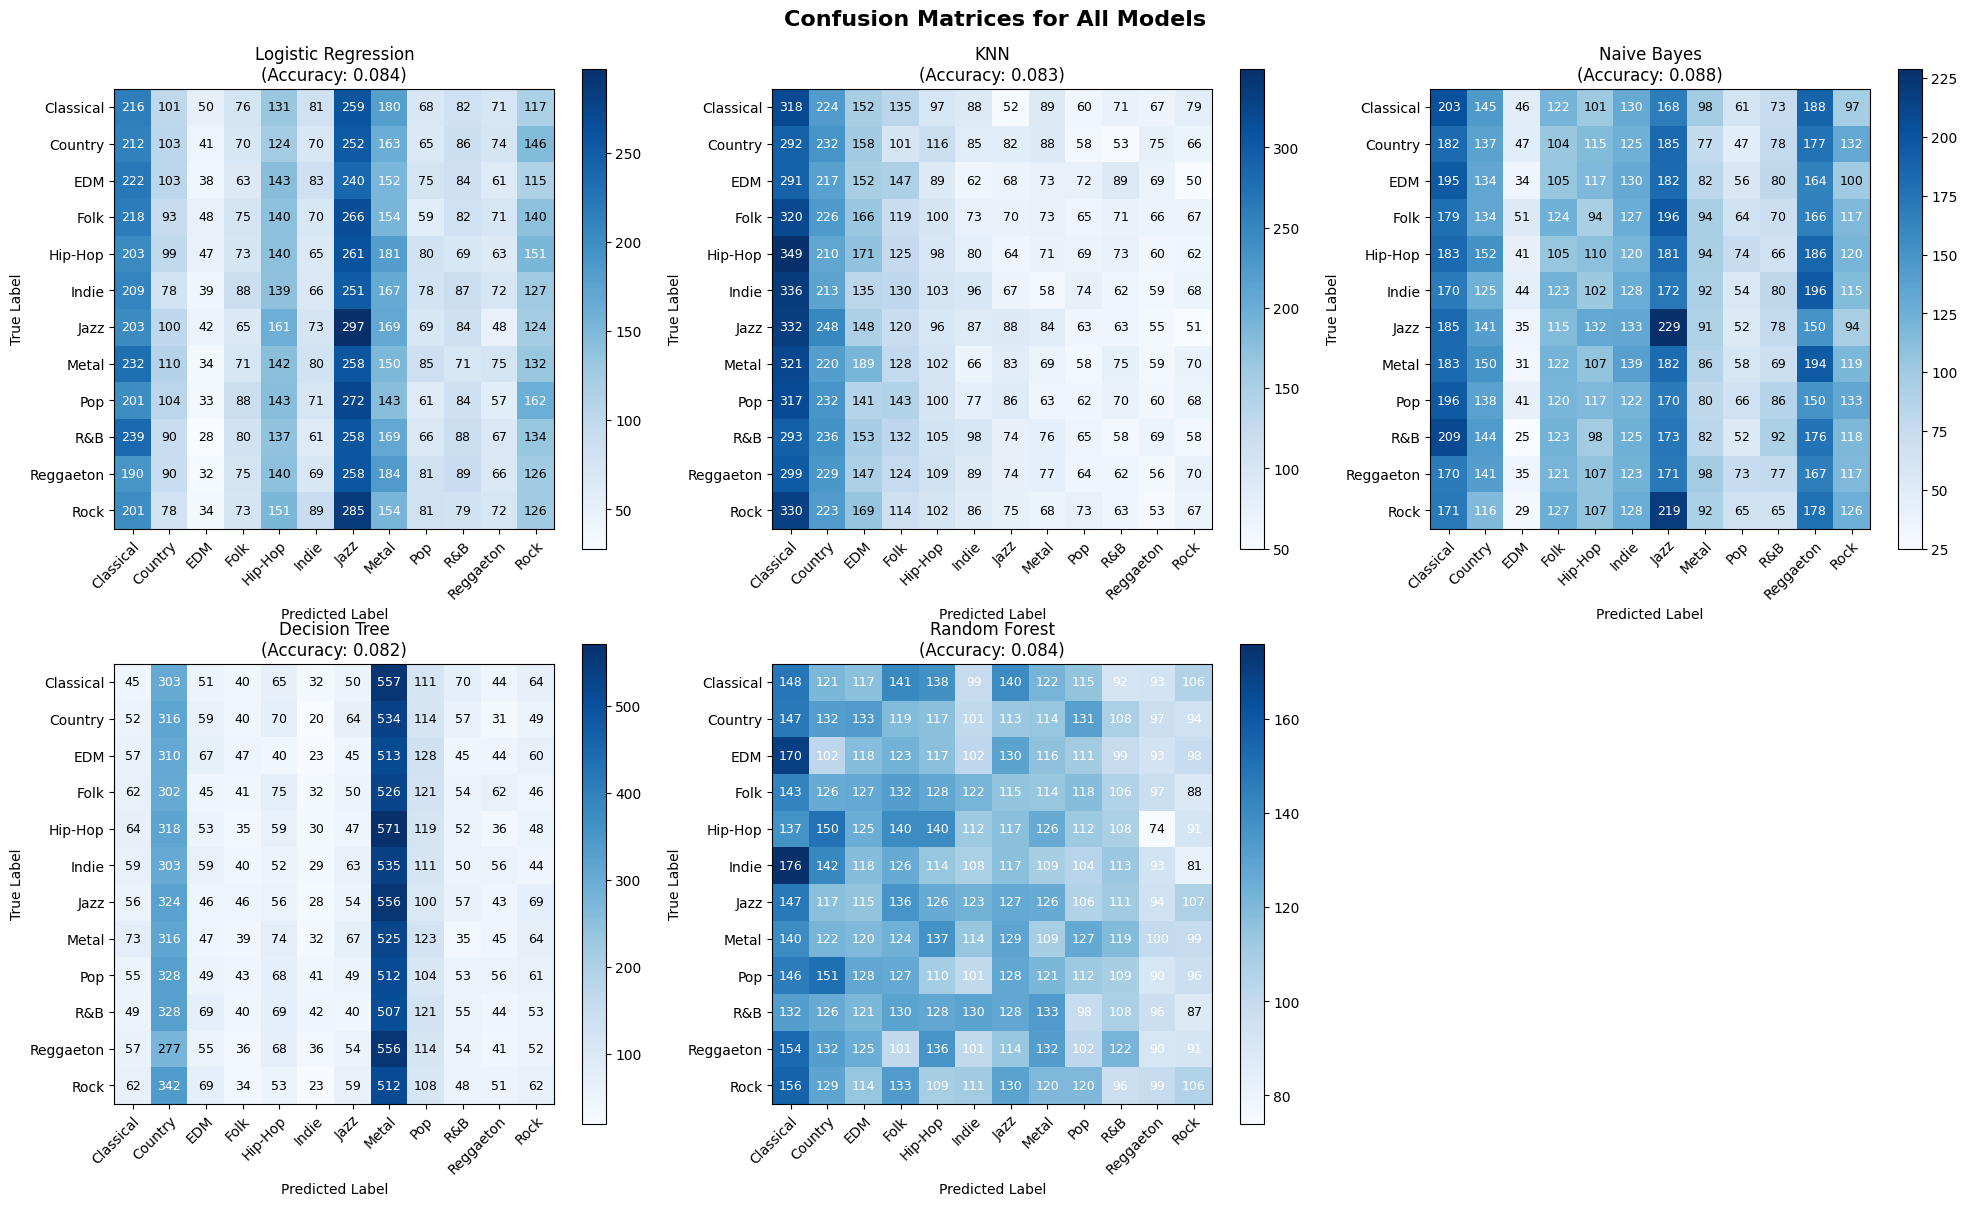

In [7]:
# Step 10: Confusion Matrices Visualization
print("\n" + "="*80)
print("CONFUSION MATRICES")
print("="*80)

# Get unique classes in sorted order
classes = sorted(y.unique())
n_classes = len(classes)

# Create subplots for confusion matrices
n_models = len(classification_results)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Remove last subplot if we have 5 models
if n_models == 5:
    fig.delaxes(axes[5])

for idx, (name, result) in enumerate(classification_results.items()):
    ax = axes[idx]
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, result['y_test_pred'], labels=classes)
    
    # Plot confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Set labels
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=classes, yticklabels=classes,
           title=f'{name}\n(Accuracy: {result["test_accuracy"]:.3f})',
           ylabel='True Label',
           xlabel='Predicted Label')
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(n_classes):
        for j in range(n_classes):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=9)

plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

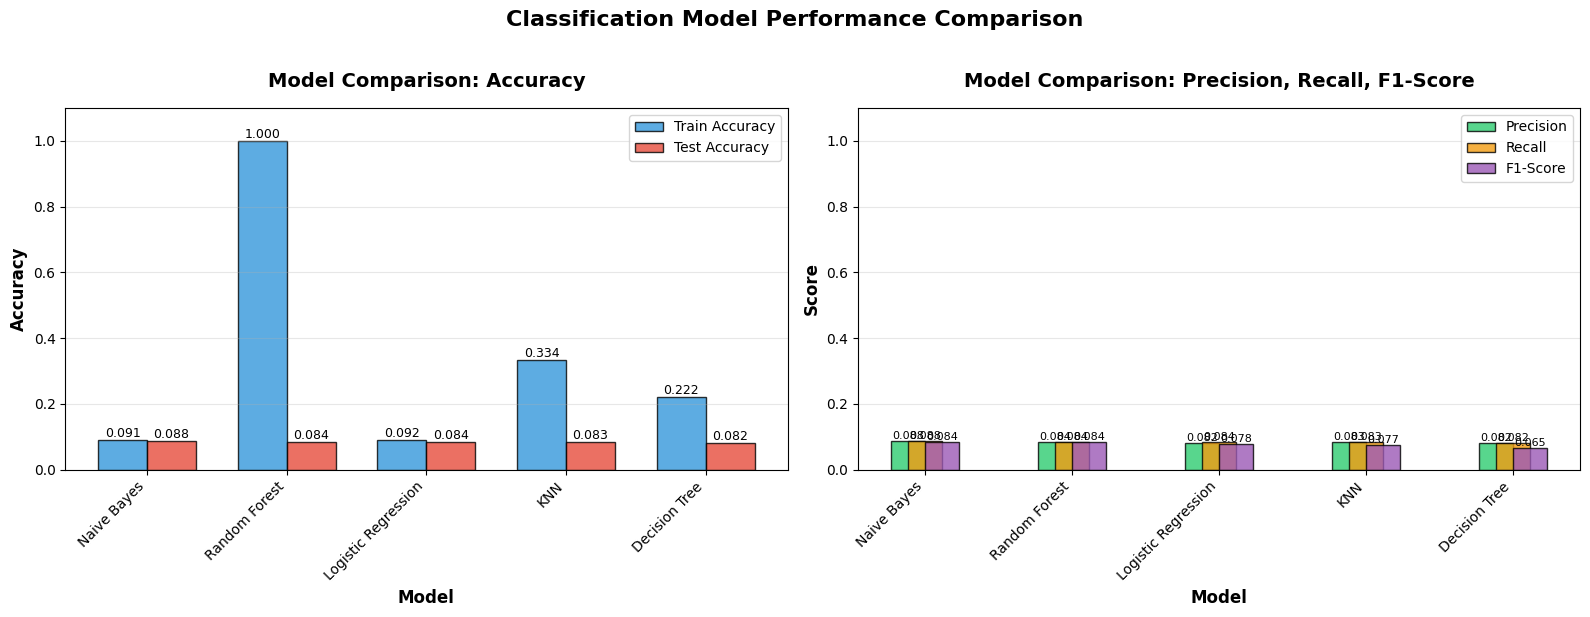

In [8]:
# Step 11: Model Comparison Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy Comparison
ax1 = axes[0]
models_list = results_class_df['Model'].values
train_acc_values = results_class_df['Train Accuracy'].values
test_acc_values = results_class_df['Test Accuracy'].values

x_pos = np.arange(len(models_list))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_acc_values, width, label='Train Accuracy', 
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, test_acc_values, width, label='Test Accuracy', 
                color='#e74c3c', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: Accuracy', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# F1-Score Comparison
ax2 = axes[1]
test_f1_values = results_class_df['Test F1-Score'].values
test_precision_values = results_class_df['Test Precision'].values
test_recall_values = results_class_df['Test Recall'].values

bars3 = ax2.bar(x_pos - width/3, test_precision_values, width/1.5, label='Precision', 
                color='#2ecc71', alpha=0.8, edgecolor='black')
bars4 = ax2.bar(x_pos, test_recall_values, width/1.5, label='Recall', 
                color='#f39c12', alpha=0.8, edgecolor='black')
bars5 = ax2.bar(x_pos + width/3, test_f1_values, width/1.5, label='F1-Score', 
                color='#9b59b6', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: Precision, Recall, F1-Score', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models_list, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1.1])

# Add value labels
for bars in [bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Classification Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [9]:
# Step 12: Feature Importance Analysis
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

feature_importance_dict = {}

# Get feature importance from tree-based models
for name, result in classification_results.items():
    model = result['model']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_dict[name] = dict(zip(feature_names, importances))
        print(f"\n{name} - Top 5 Features:")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:30s}: {imp:.4f}")

# For Logistic Regression, use absolute coefficients as importance
for name, result in classification_results.items():
    model = result['model']
    if hasattr(model, 'coef_'):
        # For multi-class, take mean of absolute coefficients across all classes
        coefs = np.abs(model.coef_).mean(axis=0)
        feature_importance_dict[name] = dict(zip(feature_names, coefs))
        print(f"\n{name} - Top 5 Features (by mean absolute coefficient):")
        sorted_features = sorted(feature_importance_dict[name].items(), 
                                key=lambda x: x[1], reverse=True)[:5]
        for feat, imp in sorted_features:
            print(f"  {feat:30s}: {imp:.4f}")


FEATURE IMPORTANCE ANALYSIS

Decision Tree - Top 5 Features:
  tempo                         : 0.1317
  loudness                      : 0.1272
  duration_min                  : 0.1249
  instrumentalness              : 0.1164
  danceability                  : 0.1076

Random Forest - Top 5 Features:
  duration_min                  : 0.1208
  tempo                         : 0.1207
  loudness                      : 0.1199
  instrumentalness              : 0.1189
  danceability                  : 0.1098

Logistic Regression - Top 5 Features (by mean absolute coefficient):
  country_Japan                 : 0.0368
  country_Australia             : 0.0354
  country_United States         : 0.0316
  country_United Kingdom        : 0.0314
  label_Columbia                : 0.0309


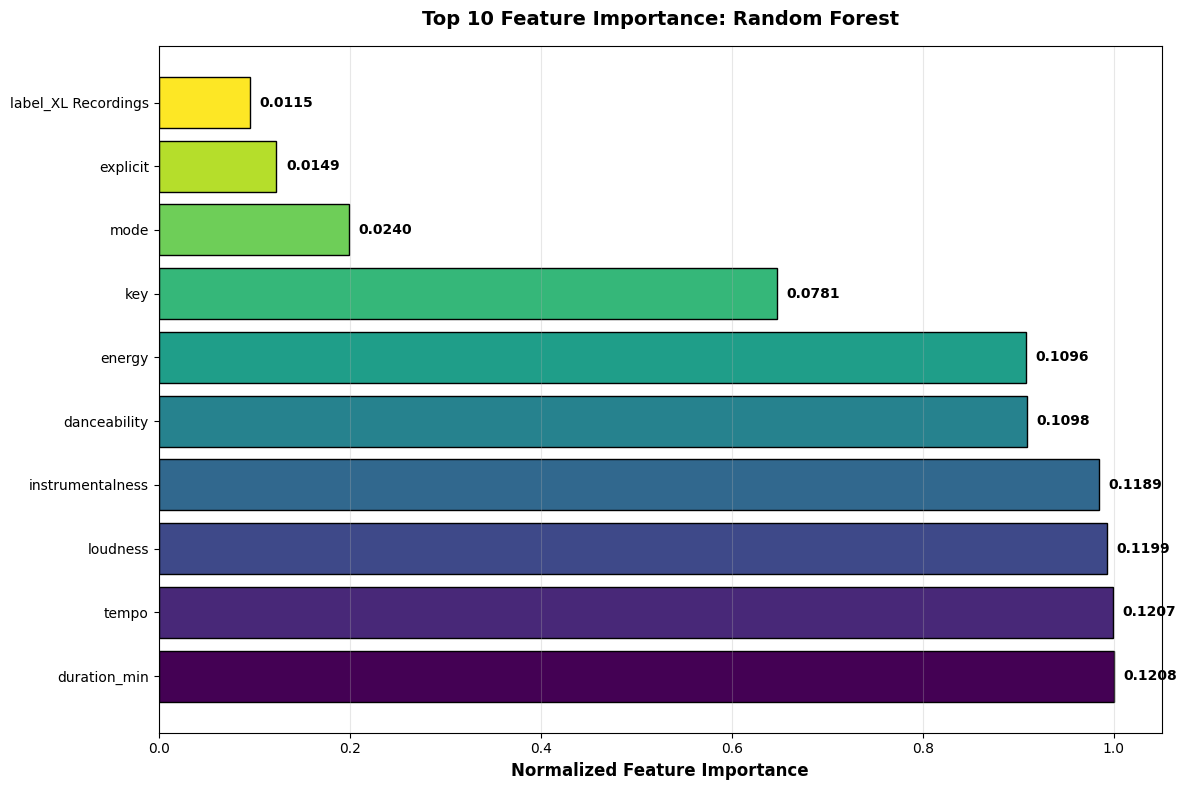

In [10]:
# Step 13: Top 10 Feature Importance Visualization
# Use Random Forest or Decision Tree for feature importance
tree_models = ['Random Forest', 'Decision Tree']
available_tree_model = None
for model_name in tree_models:
    if model_name in feature_importance_dict:
        available_tree_model = model_name
        break

if available_tree_model:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Get top 10 features
    importances = feature_importance_dict[available_tree_model]
    sorted_features = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:10]
    features = [f[0] for f in sorted_features]
    importance_values = [f[1] for f in sorted_features]
    
    # Normalize importance values for better visualization
    max_imp = max(importance_values)
    normalized_imp = [v / max_imp for v in importance_values]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
    bars = ax.barh(range(len(features)), normalized_imp, color=colors, edgecolor='black')
    
    ax.set_yticks(range(len(features)))
    ax.set_yticklabels(features)
    ax.set_xlabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 10 Feature Importance: {available_tree_model}', 
                 fontsize=14, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val, orig_val) in enumerate(zip(bars, normalized_imp, importance_values)):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
               f'{orig_val:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No tree-based model available for feature importance visualization.")


PER-CLASS PERFORMANCE: Naive Bayes

Per-Class Metrics (sorted by F1-Score):
--------------------------------------------------------------------------------
    Genre  Precision   Recall  F1-Score  Support
     Jazz   0.102783 0.159582  0.125034   1435.0
Classical   0.091195 0.141760  0.110990   1432.0
Reggaeton   0.079828 0.119286  0.095647   1400.0
     Rock   0.090778 0.088545  0.089648   1423.0
  Country   0.082680 0.097440  0.089455   1406.0
     Folk   0.087881 0.087571  0.087726   1416.0
    Indie   0.083660 0.091363  0.087342   1401.0
  Hip-Hop   0.084162 0.076816  0.080321   1432.0
      R&B   0.100656 0.064926  0.078936   1417.0
    Metal   0.080675 0.059722  0.068635   1440.0
      Pop   0.091413 0.046512  0.061653   1419.0
      EDM   0.074074 0.024656  0.036997   1379.0
--------------------------------------------------------------------------------


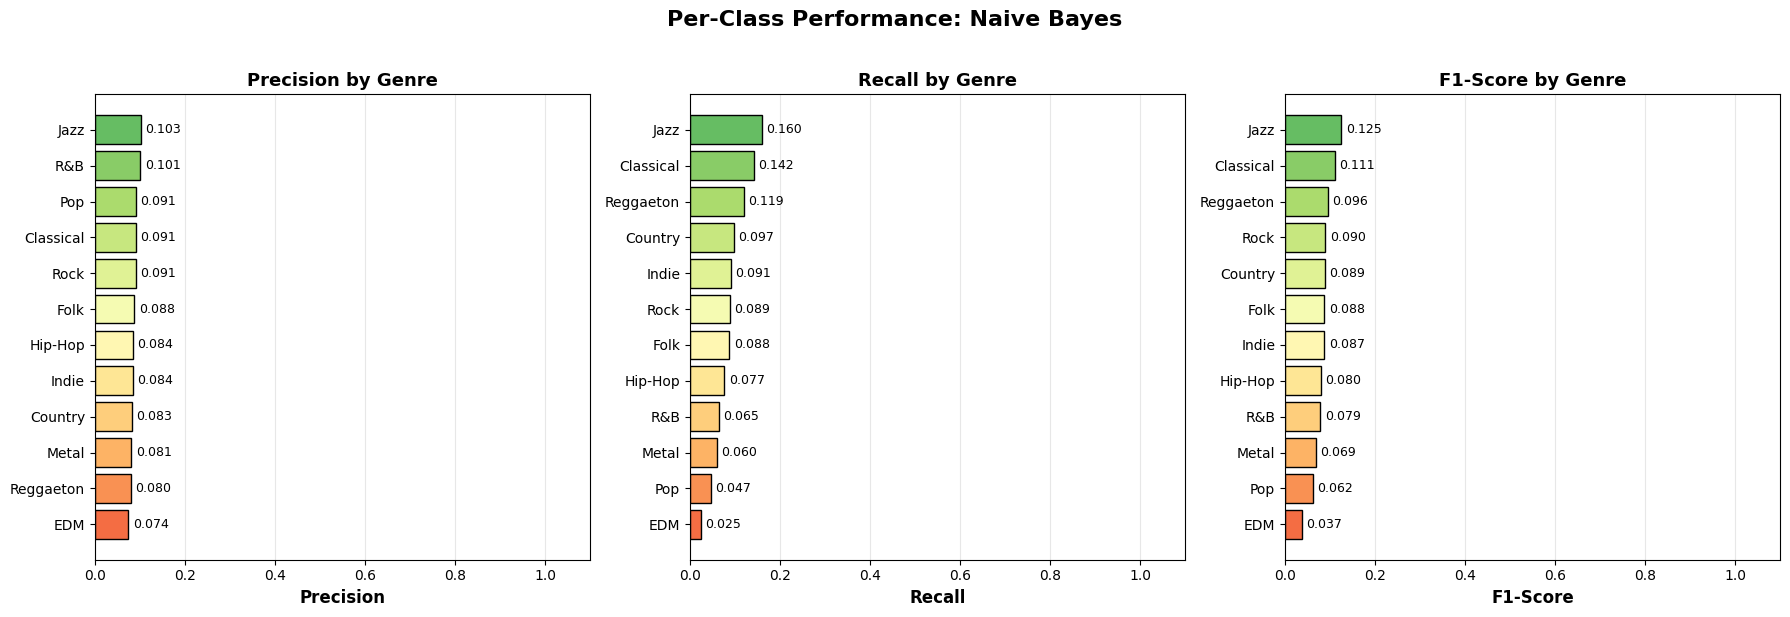

In [11]:
# Step 14: Per-Class Performance Analysis (Best Model)
print("\n" + "="*80)
print(f"PER-CLASS PERFORMANCE: {best_model_name}")
print("="*80)

best_result = classification_results[best_model_name]
report_dict = best_result['classification_report']

# Create DataFrame for per-class metrics
per_class_metrics = []
for class_name in classes:
    if class_name in report_dict:
        metrics = report_dict[class_name]
        per_class_metrics.append({
            'Genre': class_name,
            'Precision': metrics.get('precision', 0),
            'Recall': metrics.get('recall', 0),
            'F1-Score': metrics.get('f1-score', 0),
            'Support': metrics.get('support', 0)
        })

per_class_df = pd.DataFrame(per_class_metrics)
per_class_df = per_class_df.sort_values('F1-Score', ascending=False)

print("\nPer-Class Metrics (sorted by F1-Score):")
print("-"*80)
print(per_class_df.to_string(index=False))
print("-"*80)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    sorted_df = per_class_df.sort_values(metric, ascending=True)
    colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(sorted_df)))
    bars = ax.barh(range(len(sorted_df)), sorted_df[metric].values, color=colors, edgecolor='black')
    
    ax.set_yticks(range(len(sorted_df)))
    ax.set_yticklabels(sorted_df['Genre'].values)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} by Genre', fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.set_xlim([0, 1.1])
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, sorted_df[metric].values)):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
               f'{val:.3f}', ha='left', va='center', fontsize=9)

plt.suptitle(f'Per-Class Performance: {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Step 15: Final Summary
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\nDataset Information:")
print(f"  Total samples: {len(ml_class_df):,}")
print(f"  Training samples: {len(X_train):,}")
print(f"  Test samples: {len(X_test):,}")
print(f"  Features used: {len(feature_names)}")
print(f"  Number of classes: {len(classes)}")

print(f"\nTarget Variable (Genre) Statistics:")
print(f"  Classes: {', '.join(classes)}")
print(f"  Class distribution (training set):")
print(y_train.value_counts().sort_index())

print(f"\nBest Model Performance ({best_model_name}):")
print(f"  Test Accuracy: {best_test_accuracy:.4f}")
print(f"  Test Precision: {classification_results[best_model_name]['test_precision']:.4f}")
print(f"  Test Recall: {classification_results[best_model_name]['test_recall']:.4f}")
print(f"  Test F1-Score: {best_test_f1:.4f}")

print("\n" + "="*80)
print("GENRE CLASSIFICATION PIPELINE COMPLETE")
print("="*80)


FINAL SUMMARY

Dataset Information:
  Total samples: 85,000
  Training samples: 68,000
  Test samples: 17,000
  Features used: 27
  Number of classes: 12

Target Variable (Genre) Statistics:
  Classes: Classical, Country, EDM, Folk, Hip-Hop, Indie, Jazz, Metal, Pop, R&B, Reggaeton, Rock
  Class distribution (training set):
genre
Classical    5726
Country      5624
EDM          5515
Folk         5664
Hip-Hop      5728
Indie        5606
Jazz         5742
Metal        5760
Pop          5677
R&B          5667
Reggaeton    5601
Rock         5690
Name: count, dtype: int64

Best Model Performance (Naive Bayes):
  Test Accuracy: 0.0884
  Test Precision: 0.0875
  Test Recall: 0.0884
  Test F1-Score: 0.0845

GENRE CLASSIFICATION PIPELINE COMPLETE
